In [2]:
import json

In [13]:
import json
import pickle
import numpy as np

from sklearn.feature_extraction import DictVectorizer

def load_X(dataset_path, reduced=False):
    print("Loading data (feature representation X, and feature names)...")
    # Load the reduced 10k features
    if reduced:
        with open('{}/X-10k.p'.format(dataset_path), 'rb') as f:
            X = pickle.load(f)
        with open('{}/f-10k.p'.format(dataset_path), 'rb') as f:
            feature_names = pickle.load(f)
    else:
        with open('{}/X.json'.format(dataset_path), 'r') as f:
            X = json.load(f)

        # Convert to numpy array and get feature names
        vec = DictVectorizer()
        X = vec.fit_transform(X).astype("float32")
        feature_names = vec.get_feature_names_out()

    return X, feature_names


def load_y(dataset_path):
    print('Loading labels...')
    with open('{}y.json'.format(dataset_path), 'rt') as f:
        y = json.load(f)
    y = np.asarray(y)
    return y

def load_metadata(dataset_path):
    print('Loading metadata...')
    with open('{}meta.json'.format(dataset_path), 'rt') as f:
        metadata = json.load(f)
    return metadata

# Feature Dataset

In [14]:
# Set the path to the dataset
dataset_path = './extended-features/'

# Load the data
X, feature_names = load_X(dataset_path, reduced=True)
y = load_y(dataset_path)
metadata = load_metadata(dataset_path)

## Print the shape of the data (loaded from the dataset)
print(f"\n - X Shape: {X.shape}")
print(f" - y Shape: {y.shape}")
print(f" - Metadata: {len(metadata)}")

Loading data (feature representation X, and feature names)...
Loading labels...
Loading metadata...

 - X Shape: (259230, 10000)
 - y Shape: (259230,)
 - Metadata: 259230


In [16]:
y[:2]

array([0, 0])

In [40]:
metadata

[{'dex_date': '2016-04-05T17:58:46',
  'markets': 'anzhi',
  'analysis_engines': [],
  'user_id': 1,
  'sha256': '0000003B455A6C7AF837EF90F2EAFFD856E3B5CF49F5E27191430328DE2FA670',
  'dex_size': 4765888,
  'vercode': '121',
  'submission_date': 1519654338,
  'sha1': '9C14D537A7ADB4CFC43D291352F73E05E0CCDD4A',
  'vt_detection': 0,
  'apk_size': 10386469,
  'pkg_name': 'com.zte.bamachaye',
  'dex_date_quarter': '2016-Q2',
  'tags': ['androzoo'],
  'sample_path': '/media/nas/datasets/android/samples/Androzoo/0/0/0/0000003B455A6C7AF837EF90F2EAFFD856E3B5CF49F5E27191430328DE2FA670.apk',
  'vt_scan_date': 1466004404,
  'md5': '3EDFC78AB53521942798AD551027D04F'},
 {'dex_date': '2016-01-19T13:28:36',
  'markets': 'play.google.com',
  'analysis_engines': [],
  'user_id': 1,
  'sha256': '0000143EF8D00E3A65C5C8C380221D00678FED906FDC2EBC483D1987457C7B2B',
  'dex_size': 1862492,
  'vercode': '70101',
  'submission_date': 1519654338,
  'sha1': 'DAF886288EB27F9C0B866EB19A357E1E866AF4DC',
  'vt_detecti

KeyError: 'dex_date_quarter'

In [38]:
# Assuming metadata, y are already loaded as shown in the images

# Create a list to store combined data
combined_data = []

# Iterate through metadata and labels simultaneously
for meta, label in zip(metadata, y):
    # Extract the quarter from metadata, use 'Unknown' if not present
    quarter = meta.get('dex_date_quarter', 'Unknown')
    
    # Determine if it's benign or malicious
    category = 'benign' if label == 0 else 'malicious'
    
    # Combine the data
    combined_data.append({
        'quarter': quarter,
        'category': category
    })

# Print the first few entries to verify
print("Sample of combined data:")
for entry in combined_data[:5]:
    print(entry)

# Count occurrences for each quarter and category
from collections import defaultdict

quarterly_counts = defaultdict(lambda: {'benign': 0, 'malicious': 0})

for entry in combined_data:
    quarterly_counts[entry['quarter']][entry['category']] += 1

# Print the counts
print("\nQuarterly counts:")
for quarter, counts in sorted(quarterly_counts.items(), key=lambda x: (x[0] != 'Unknown', x[0])):
    print(f"{quarter}: Benign: {counts['benign']}, Malicious: {counts['malicious']}")

Sample of combined data:
{'quarter': '2016-Q2', 'category': 'benign'}
{'quarter': '2016-Q1', 'category': 'benign'}
{'quarter': '2016-Q1', 'category': 'benign'}
{'quarter': '2014-Q3', 'category': 'benign'}
{'quarter': '2016-Q2', 'category': 'benign'}

Quarterly counts:
Unknown: Benign: 115850, Malicious: 13652
2014-Q1: Benign: 9992, Malicious: 1026
2014-Q2: Benign: 15246, Malicious: 1818
2014-Q3: Benign: 17708, Malicious: 1970
2014-Q4: Benign: 9097, Malicious: 883
2015-Q1: Benign: 4683, Malicious: 488
2015-Q2: Benign: 5889, Malicious: 620
2015-Q3: Benign: 8365, Malicious: 901
2015-Q4: Benign: 9231, Malicious: 1056
2016-Q1: Benign: 13255, Malicious: 1455
2016-Q2: Benign: 13226, Malicious: 1342
2016-Q3: Benign: 9286, Malicious: 1064
2016-Q4: Benign: 1015, Malicious: 112


In [10]:
features[103]

{"app_permissions::name='android_permission_ACCESS_NETWORK_STATE'": 1,
 'activities::_MainActivity': 1,
 'interesting_calls::Read/Write External Storage': 1,
 's_and_r::_DownloadService': 1,
 "app_permissions::name='android_permission_INTERNET'": 1,
 'interesting_calls::getPackageInfo': 1,
 'intents::android_intent_category_DEFAULT': 1,
 "app_permissions::name='android_permission_GET_TASKS'": 1,
 'intents::android_intent_action_MAIN': 1,
 'intents::android_intent_category_LAUNCHER': 1,
 "app_permissions::name='android_permission_WRITE_EXTERNAL_STORAGE'": 1}

In [7]:
features[32]

{"app_permissions::name='android_permission_SYSTEM_ALERT_WINDOW'": 1,
 'activities::_MainActivity': 1,
 'interesting_calls::Read/Write External Storage': 1,
 'intents::android_intent_action_MAIN': 1,
 'interesting_calls::getPackageInfo': 1,
 'intents::android_intent_category_DEFAULT': 1,
 "app_permissions::name='android_permission_GET_TASKS'": 1,
 'intents::android_intent_category_LAUNCHER': 1,
 "app_permissions::name='android_permission_WRITE_EXTERNAL_STORAGE'": 1,
 "app_permissions::name='android_permission_MOUNT_UNMOUNT_FILESYSTEMS'": 1}

In [7]:
from sklearn.feature_extraction import DictVectorizer

# Create the DictVectorizer
vec = DictVectorizer()

# Transform the data into a sparse matrix
X = vec.fit_transform(features).astype("float32")

# Get feature names
feature_names = vec.get_feature_names_out()

# Print the shape of the resulting matrix
print(f"Shape of X: {X.shape}")

# Print the feature names
print("Feature names:", feature_names)

# Print the sparse matrix (first 5 rows and columns for readability)
print("Sparse matrix (first 5x5 part):")
print(X[:5, :5].toarray())

Shape of X: (259230, 2657297)
Feature names: ['activities::###' 'activities::#1 Password Generator'
 'activities::#GaGTC15' ...
 'urls::https://zzenjqa_weshare_com_cn/mist/smsUpload/v1/upload'
 'urls::https://zzenjqa_weshare_com_cn/morphine/V1/getImage'
 'urls::https://zzenjqa_weshare_com_cn/queenant/V1/validateCID']
Sparse matrix (first 5x5 part):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [12]:
# Get the feature names
feature_names = vec.get_feature_names_out()

# Get the indices of non-zero elements
row_indices, col_indices = X.nonzero()

In [22]:
row_indices

array([     0,      0,      0, ..., 259229, 259229, 259229], dtype=int32)

#### Test.. for api permission

In [56]:
new_list2 = []
for software in features:
    tmp = {}
    for feature, value in software.items():
        if 'permissions' in feature:
            tmp[feature] = value
    new_list2.append(tmp)

In [57]:
api_calls_list = []

for b in new_list2:
    for k, v in b.items():
        api_calls_list.append(k)

print(len(api_calls_list))
api_calls_set = set(api_calls_list)
print(len(api_calls_set))
print(list(api_calls_set)[:10])

4460812
76423
["app_permissions::name='com_touchpal_atheme_gray_orange_permission_C2D_MESSAGE'", "app_permissions::name='com_didi_passenger_sdk_login_permission_broadcast_com_taxis99'", "app_permissions::name='com_bsoft_syk_doctor_permission_CONFIGURE_SIP'", "app_permissions::name='theme_land_lava_z10_z25_a73_sony_xperia_l1_xzs_wallpaper_launcher_permission_C2D_MESSAGE'", "app_permissions::name='baidu_push_permission_WRITE_PUSHINFOPROVIDER_com_appplus_Genkei'", "app_permissions::name='com_nosetime_perfume_permission_JPUSH_MESSAGE'", "app_permissions::name='se_bankgirot_swish_permission_C2D_MESSAGE'", "app_permissions::name='ru_ktktelecom_volnamobile_permission_MAPS_RECEIVE'", "app_permissions::name='com_kingkr_krutspf_permission_JPUSH_MESSAGE'", "app_permissions::name='com_supernova_CokekSragen_permission_C2D_MESSAGE'"]


## Create new list containing 'api_calls' features only

In [23]:
new_list = []
for software in features:
    tmp = {}
    for feature, value in software.items():
        if 'api_calls' in feature:
            tmp[feature] = value
    new_list.append(tmp)

### Total number of 'api_calls' feature

In [37]:
total_num = 0
for b in new_list:
    total_num += len(b)

print(total_num)

2496347


### Filter only unique 'api_calls' feature
: remove duplicate fatures

In [44]:
api_calls_list = []

for b in new_list:
    for k, v in b.items():
        api_calls_list.append(k)

print(len(api_calls_list))
api_calls_set = set(api_calls_list)
print(len(api_calls_set))
print(api_calls_set)

2496347
315
{'api_calls::android/content/ContextWrapper;->startService', 'api_calls::android/bluetooth/BluetoothAdapter;->setScanMode', 'api_calls::android/content/pm/PackageManager;->setApplicationEnabledSetting', 'api_calls::android/provider/UserDictionary$Words;->addWord', 'api_calls::android/content/ContentResolver;->isSyncActive', 'api_calls::android/app/Activity;->removeStickyBroadcast', 'api_calls::android/content/Context;->sendOrderedBroadcast', 'api_calls::android/provider/Browser;->deleteFromHistory', 'api_calls::android/provider/Calendar$CalendarAlerts;->query', 'api_calls::android/net/Downloads$ByUri;->getCurrentOtaDownloads', 'api_calls::android/accounts/AccountManager;->blockingGetAuthToken', 'api_calls::android/provider/Calendar$Calendars;->delete', 'api_calls::android/app/Application;->setWallpaper', 'api_calls::android/content/ContentResolver;->query', 'api_calls::android/app/admin/DevicePolicyManager;->reportFailedPasswordAttempt', 'api_calls::android/bluetooth/Headse

In [33]:
for b in new_list[:2]:
    for k, v in b.items():
        print(f"{k}: {v}")
    print("------------------------------------------------------------------------------------")

api_calls::android/app/NotificationManager;->notify: 1
api_calls::android/accounts/AccountManager;->addAccount: 1
api_calls::android/hardware/Camera;->open: 1
api_calls::org/apache/http/impl/client/DefaultHttpClient: 1
api_calls::android/location/LocationManager;->getBestProvider: 1
api_calls::android/content/pm/PackageManager;->setComponentEnabledSetting: 1
api_calls::android/net/wifi/WifiManager;->startScan: 1
api_calls::android/net/wifi/WifiManager;->getConnectionInfo: 1
api_calls::android/app/Instrumentation;->sendKeyDownUpSync: 1
api_calls::android/app/ActivityManager;->getRunningTasks: 1
api_calls::android/telephony/TelephonyManager;->getDeviceId: 1
api_calls::android/provider/Settings$System;->putString: 1
api_calls::android/content/Context;->startActivity: 1
api_calls::java/lang/Runtime;->exec: 1
api_calls::android/accounts/AccountManager;->getAccounts: 1
api_calls::android/content/ContentResolver;->openInputStream: 1
api_calls::android/os/PowerManager$WakeLock;->acquire: 1
api

# Class Dataset

In [11]:
with open(target_path) as f:
    targets = json.load(f)

targets[0]

0

In [12]:
len(targets)

259230

In [17]:
sum(targets)

26387

In [18]:
len(targets) - sum(targets)

232843

In [1]:
import time

import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

import shap

X_train, X_test, Y_train, Y_test = train_test_split(
    *shap.datasets.iris(), test_size=0.2, random_state=0
)

# rather than use the whole training set to estimate expected values, we could summarize with
# a set of weighted kmeans, each weighted by the number of points they represent. But this dataset
# is so small we don't worry about it
# X_train_summary = shap.kmeans(X_train, 50)


def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test) == Y_test) / len(Y_test)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

In [16]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(
    n_estimators=100, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [19]:
# explain all the predictions in the test set
# explainer = shap.KernelExplainer(rforest.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)

explainer = shap.Explainer(rforest)
shap_values = explainer(X_train)

In [20]:
shap_values.shape

(120, 4, 3)

In [11]:
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

In [21]:
shap.plots.waterfall(shap_values[0])

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (4, 3)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import LinearSVC

data = load_breast_cancer()

X, y = data['data'], data['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
clf = LinearSVC()
clf.fit(X_train, y_train)

/Users/leon/anaconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/leon/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [31]:
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 10))

In [33]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/114 [00:00<?, ?it/s]

In [3]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

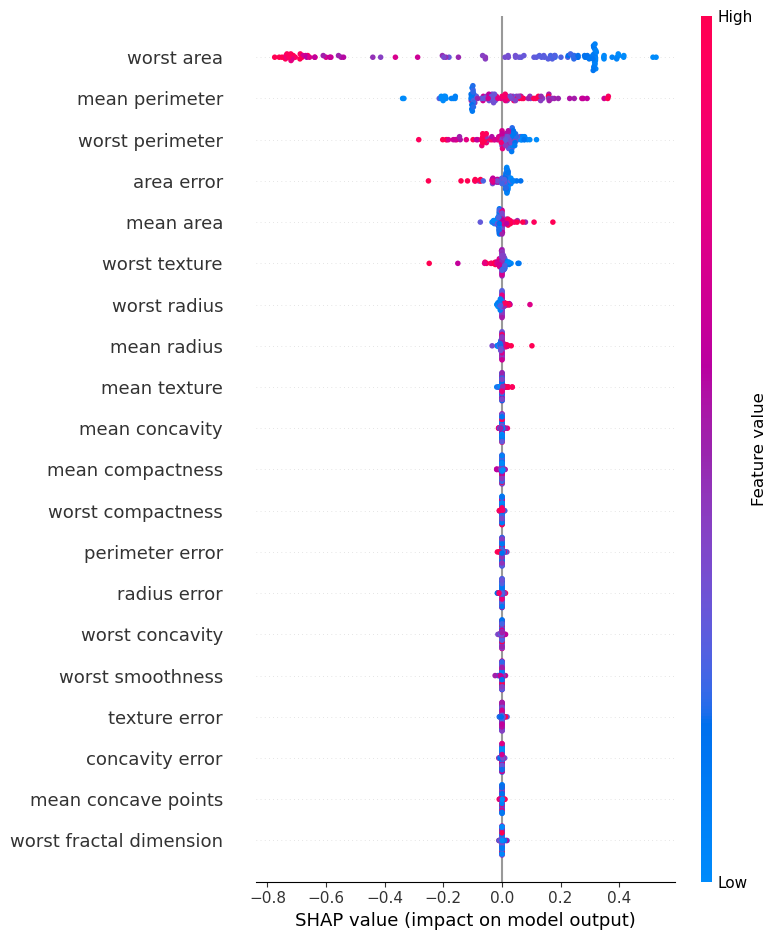

In [34]:
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])

In [37]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=data['feature_names'])

In [38]:
shap.force_plot(explainer.expected_value, shap_values[2], X_test[2], feature_names=data['feature_names'])

In [40]:
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

In [50]:
feature_names = data['feature_names']
feature_importance = zip(feature_names, mean_abs_shap_values)

for feature, importance in feature_importance:
    print(feature, ":", importance)

mean radius : 0.0063220724603681505
mean texture : 0.00378142530985219
mean perimeter : 0.10568485332068031
mean area : 0.016420449564374048
mean smoothness : 0.001280754759541355
mean compactness : 0.0018196335556080578
mean concavity : 0.0019125040512071592
mean concave points : 0.0013604428268476677
mean symmetry : 0.001306611784204033
mean fractal dimension : 0.001318046682447702
radius error : 0.0015620166105940075
texture error : 0.0014336524014390288
perimeter error : 0.0015742994653923116
area error : 0.026161952668218868
smoothness error : 0.0010787887339751682
compactness error : 0.0012123808497602492
concavity error : 0.0014275050710079269
concave points error : 0.001172651919289336
symmetry error : 0.0012589591726131235
fractal dimension error : 0.0008001586359656074
worst radius : 0.007597709131925806
worst texture : 0.013816011924808748
worst perimeter : 0.050433037909697886
worst area : 0.3687124023683971
worst smoothness : 0.001518988320785616
worst compactness : 0.0016

In [46]:
sorted_feature_importances = sorted(feature_importance, key=lambda x: x[1], reverse=True)

In [48]:
for feature, importance in sorted_feature_importances:
    print(feature, ":", importance)

worst area : 0.3687124023683971
mean perimeter : 0.10568485332068031
worst perimeter : 0.050433037909697886
area error : 0.026161952668218868
mean area : 0.016420449564374048
worst texture : 0.013816011924808748
worst radius : 0.007597709131925806
mean radius : 0.0063220724603681505
mean texture : 0.00378142530985219
mean concavity : 0.0019125040512071592
mean compactness : 0.0018196335556080578
worst compactness : 0.001622816209472477
perimeter error : 0.0015742994653923116
radius error : 0.0015620166105940075
worst concavity : 0.0015300717202376712
worst smoothness : 0.001518988320785616
texture error : 0.0014336524014390288
concavity error : 0.0014275050710079269
mean concave points : 0.0013604428268476677
worst fractal dimension : 0.0013585443422318934
mean fractal dimension : 0.001318046682447702
mean symmetry : 0.001306611784204033
mean smoothness : 0.001280754759541355
symmetry error : 0.0012589591726131235
worst symmetry : 0.0012308977552672243
compactness error : 0.00121238084